In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

In [3]:
#Creating empty lists to store data
city_name =  []
lattitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
dates = []

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial endpoint URL
endpoint = f"{base_url}appid={weather_api_key}&units={units}&q="

# Looping through cities list and avoiding error codes
print(f"Beginning Data Retrieval\n")
print(f"_____________________________\n")
for city in cities:
    try:
        response = requests.get(endpoint + city).json()
        print(f"Processing record of {cities.index(city)}| {city}")
        city_name.append(response['name'])
        lattitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
    except KeyError:
        print(f"City not found.....skipping")

print(f"_____________________________\n")
print(f"Data Retrieval Complete\n")
print(f"_____________________________")

Beginning Data Retrieval

_____________________________

Processing record of 0| druzhba
Processing record of 1| dikson
Processing record of 2| mancio lima
Processing record of 3| ivankiv
Processing record of 4| hobart
Processing record of 5| sorvag
City not found.....skipping
Processing record of 6| tautira
Processing record of 7| upernavik
Processing record of 8| adrar
Processing record of 9| ushuaia
Processing record of 10| beloha
Processing record of 11| palmer
Processing record of 12| san patricio
Processing record of 13| longyearbyen
Processing record of 14| vaini
Processing record of 15| mataura
Processing record of 16| katsuura
Processing record of 17| mbuji-mayi
Processing record of 18| illoqqortoormiut
City not found.....skipping
Processing record of 19| lebu
Processing record of 20| taolanaro
City not found.....skipping
Processing record of 21| cruzeiro do sul
Processing record of 22| chifeng
Processing record of 23| bay city
Processing record of 24| kutum
Processing record 

In [5]:
#Creating dataframe

data = {
    "City": city_name,
    "Lat": lattitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Windspeed": windspeed,
    "Country": country,
    "Date": dates
}

data_df = pd.DataFrame(data)

data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Druzhba,52.0428,33.9453,68.04,94,47,7.18,UA,1624405444
1,Dikson,73.5069,80.5464,31.86,86,100,15.93,RU,1624405444
2,Mâncio Lima,-7.6142,-72.8958,75.33,76,81,2.37,BR,1624405444
3,Ivankiv,50.9386,29.8943,73.60,92,36,4.54,UA,1624405445
4,Hobart,-42.8794,147.3294,46.11,91,0,3.00,AU,1624405218


In [6]:
#exporting data to .csv file
data_df.to_csv("temperaturedata.csv", index=False, header=True, encoding="utf-8")

In [7]:
#checking the data
data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,542.000000,542.000000,542.000000,542.000000,542.00000,542.000000,5.420000e+02
mean,19.729585,20.986288,67.502085,70.634686,54.45572,7.326679,1.624406e+09
std,33.900728,90.703413,13.567827,20.978541,37.18760,5.152741,7.299151e+01
min,-54.800000,-179.166700,31.860000,8.000000,0.00000,0.000000,1.624405e+09
25%,-8.150250,-58.379325,57.120000,59.250000,20.00000,3.440000,1.624405e+09
50%,24.390550,25.712600,68.770000,76.000000,61.00000,6.060000,1.624406e+09
75%,47.612200,100.349575,77.530000,87.000000,90.00000,10.360000,1.624406e+09
max,78.218600,179.316700,106.120000,100.000000,100.00000,28.610000,1.624406e+09


In [8]:
#getting indexes of rows with 100 humidity

humidity_100 = []

for row in range(0,len(data_df)):
    if data_df['Humidity'][row] == 100:
        humidity_100.append(row)

len(humidity_100)

7

In [9]:
# dropping all cities with 100 humidity and verifying
clean_city_data = data_df.drop(humidity_100, inplace=False)

clean_city_data.count()

City          535
Lat           535
Lng           535
Max Temp      535
Humidity      535
Cloudiness    535
Windspeed     535
Country       535
Date          535
dtype: int64

In [10]:
data_df.count() #confirming data was dropped

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Windspeed     542
Country       542
Date          542
dtype: int64

In [11]:
# Getting correct date format

clean_city_data["New Time"] = pd.to_datetime(clean_city_data["Date"], unit='s')
clean_city_data['New Date'] = pd.to_datetime(clean_city_data["New Time"]).dt.date
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date,New Time,New Date
0,Druzhba,52.0428,33.9453,68.04,94,47,7.18,UA,1624405444,2021-06-22 23:44:04,2021-06-22
1,Dikson,73.5069,80.5464,31.86,86,100,15.93,RU,1624405444,2021-06-22 23:44:04,2021-06-22
2,Mâncio Lima,-7.6142,-72.8958,75.33,76,81,2.37,BR,1624405444,2021-06-22 23:44:04,2021-06-22
3,Ivankiv,50.9386,29.8943,73.60,92,36,4.54,UA,1624405445,2021-06-22 23:44:05,2021-06-22
4,Hobart,-42.8794,147.3294,46.11,91,0,3.00,AU,1624405218,2021-06-22 23:40:18,2021-06-22


In [12]:
# creating and storing date varaible
date = clean_city_data["New Date"][0]

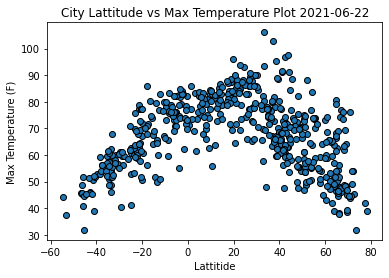

In [13]:
#Lattitude vs Temperature plot

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.xlabel("Lattitide")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Lattitude vs Max Temperature Plot {date}")
plt.savefig(os.path.join(os.getcwd(),"DataImages","image1.png"))
plt.show()

THe scatter plot shows that the max temperatures are lower the further you are from the equator and as you move towards it, temperature rises.

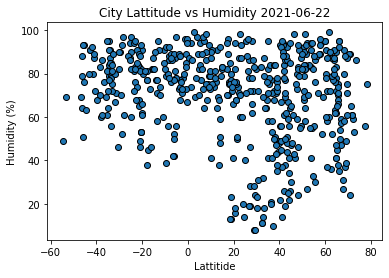

In [14]:
#Lattitude vs Humidity plot

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data['Humidity']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.xlabel("Lattitide")
plt.ylabel("Humidity (%)")
plt.title(f"City Lattitude vs Humidity {date}")
plt.savefig(os.path.join(os.getcwd(),"DataImages","image2.png"))
plt.show()

There seems to be no corelation between Lattitude and humidity

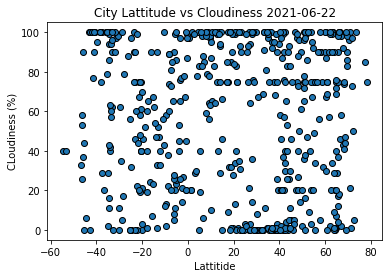

In [15]:
#Lattitude vs Cloudiness plot

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.xlabel("Lattitide")
plt.ylabel("CLoudiness (%)")
plt.title(f"City Lattitude vs Cloudiness {date}")
plt.savefig(os.path.join(os.getcwd(),"DataImages","image3.png"))
plt.show()

There seems to be no corelation between Cloudiness and Lattitude but a lot of cities either have 100% clouds or 0%.

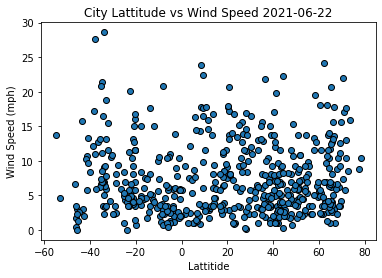

In [16]:
#Lattitude vs Windspeed plot

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data['Windspeed']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.xlabel("Lattitide")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Lattitude vs Wind Speed {date}")
plt.savefig(os.path.join(os.getcwd(),"DataImages","image4.png"))
plt.show()

There seems to be no corelation between windspeed and lattitude.

In [17]:
northern_hemp_data = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemp_data = clean_city_data.loc[clean_city_data["Lat"] <= 0]

In [18]:
northern_hemp_data["Lat"].min() #verify data

0.3533

In [19]:
southern_hemp_data["Lat"].max() #verify data

-0.3167

The r-value is : -0.6578077470491326


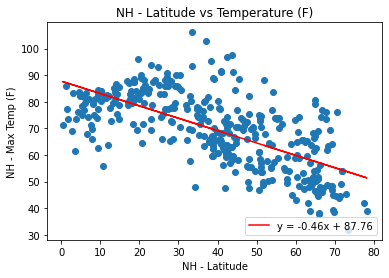

In [20]:
# NH Temperature vs Latitude

x_val = northern_hemp_data["Lat"]
y_val = northern_hemp_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression_values = x_val * slope + intercept
line_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regression_values, 'r-', label=line_equation.format(slope,intercept))
plt.xlabel('NH - Latitude')
plt.ylabel('NH - Max Temp (F)')
plt.title("NH - Latitude vs Temperature (F)")
plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(),"DataImages","image5.png"))
print(f"The r-value is : {st.pearsonr(x_val,y_val)[0]}")
plt.show()

There is a moderately negative co-relation between lattitude and temperature as seen by the regression line and the r value.

The r-value is : 0.8093588018272698


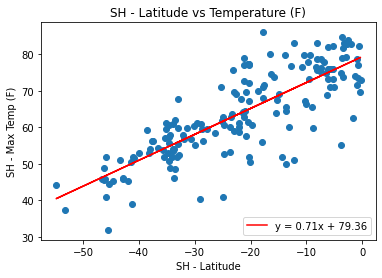

In [21]:
# SH Temperature vs Lattitude

x_val = southern_hemp_data["Lat"]
y_val = southern_hemp_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression_values = x_val * slope + intercept
line_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regression_values, 'r-', label=line_equation.format(slope,intercept))
plt.xlabel('SH - Latitude')
plt.ylabel('SH - Max Temp (F)')
plt.title("SH - Latitude vs Temperature (F)")
plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(),"DataImages","image6.png"))
print(f"The r-value is : {st.pearsonr(x_val,y_val)[0]}")
plt.show()

There is a strong positve corelation between lattitude and temperature.

The r-value is : -0.057102480321302954


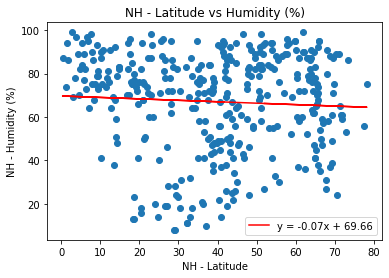

In [22]:
# NH Humidity (%) vs Latitude

x_val = northern_hemp_data["Lat"]
y_val = northern_hemp_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression_values = x_val * slope + intercept
line_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regression_values, 'r-', label=line_equation.format(slope,intercept))
plt.xlabel('NH - Latitude')
plt.ylabel('NH - Humidity (%)')
plt.title("NH - Latitude vs Humidity (%)")
plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(),"DataImages","image7.png"))
print(f"The r-value is : {st.pearsonr(x_val,y_val)[0]}")
plt.show()

The regression line and r value show that there is no corelation between latitude and humidity

The r-value is : 0.013729757130669037


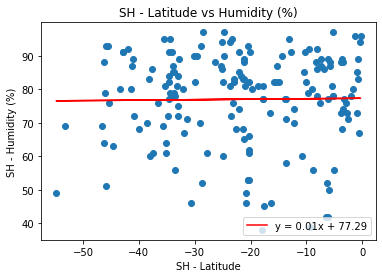

In [23]:
# SH Humidity (%) vs Latitude

x_val = southern_hemp_data["Lat"]
y_val = southern_hemp_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression_values = x_val * slope + intercept
line_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regression_values, 'r-', label=line_equation.format(slope,intercept))
plt.xlabel('SH - Latitude')
plt.ylabel('SH - Humidity (%)')
plt.title("SH - Latitude vs Humidity (%)")
plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(),"DataImages","image8.png"))
print(f"The r-value is : {st.pearsonr(x_val,y_val)[0]}")
plt.show()

The regression line and r value show that there is no corelation between latitude and humidity

The r-value is : -0.05978011153210256


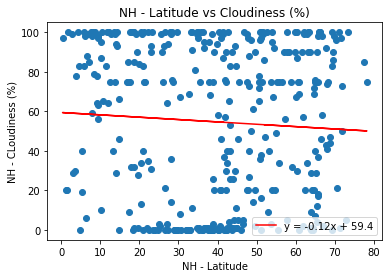

In [24]:
# NH Cloudiness (%) vs Latitude

x_val = northern_hemp_data["Lat"]
y_val = northern_hemp_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression_values = x_val * slope + intercept
line_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regression_values, 'r-', label=line_equation.format(slope,intercept))
plt.xlabel('NH - Latitude')
plt.ylabel('NH - CLoudiness (%)')
plt.title("NH - Latitude vs Cloudiness (%)")
plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(),"DataImages","image9.png"))
print(f"The r-value is : {st.pearsonr(x_val,y_val)[0]}")
plt.show()

The regression line and r value show that there is no corelation between latitude and cloudiness

The r-value is : -0.10750974928005337


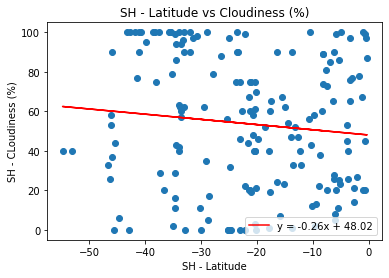

In [25]:
# SH Cloudiness (%) vs Latitude

x_val = southern_hemp_data["Lat"]
y_val = southern_hemp_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression_values = x_val * slope + intercept
line_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regression_values, 'r-', label=line_equation.format(slope,intercept))
plt.xlabel('SH - Latitude')
plt.ylabel('SH - CLoudiness (%)')
plt.title("SH - Latitude vs Cloudiness (%)")
plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(),"DataImages","image10.png"))
print(f"The r-value is : {st.pearsonr(x_val,y_val)[0]}")
plt.show()

The regression line and r value show that there is no corelation between latitude and cloudiness

The r-value is : 0.014206346180082872


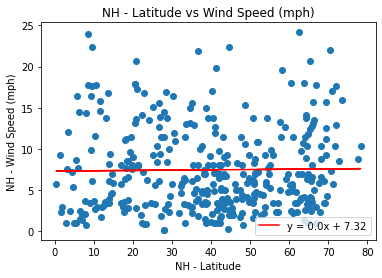

In [26]:
# NH Wind Speed (mph) vs Latitude

x_val = northern_hemp_data["Lat"]
y_val = northern_hemp_data['Windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression_values = x_val * slope + intercept
line_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regression_values, 'r-', label=line_equation.format(slope,intercept))
plt.xlabel('NH - Latitude')
plt.ylabel('NH - Wind Speed (mph)')
plt.title("NH - Latitude vs Wind Speed (mph)")
plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(),"DataImages","image11.png"))
print(f"The r-value is : {st.pearsonr(x_val,y_val)[0]}")
plt.show()

The regression line and r value show that there is no corelation between latitude and windspeed

The r-value is : -0.22528747725751644


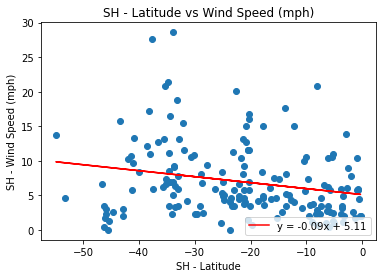

In [27]:
# NH Wind Speed (mph) vs Latitude

x_val = southern_hemp_data["Lat"]
y_val = southern_hemp_data['Windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression_values = x_val * slope + intercept
line_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regression_values, 'r-', label=line_equation.format(slope,intercept))
plt.xlabel('SH - Latitude')
plt.ylabel('SH - Wind Speed (mph)')
plt.title("SH - Latitude vs Wind Speed (mph)")
plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(),"DataImages","image12.png"))
print(f"The r-value is : {st.pearsonr(x_val,y_val)[0]}")
plt.show()

The regression line and r value show that there is no corelation between latitude and windspeed